In [1]:
library(readxl)
# Load the Excel file
ps <- read_excel("jumlahkpm2025.xlsx", sheet = 1)
# Filer jenis == NON TUNAI
ps <- ps[ps$jenis == "NON TUNAI", ]
# Display the first few rows of the filtered data
head(ps)
sum(ps$nps)

prov,kabkot,jenis,bank,nps
<chr>,<chr>,<chr>,<chr>,<dbl>
ACEH,ACEH BARAT,NON TUNAI,BSI,16426
ACEH,ACEH BARAT DAYA,NON TUNAI,BSI,17209
ACEH,ACEH BESAR,NON TUNAI,BSI,35651
ACEH,ACEH JAYA,NON TUNAI,BSI,7874
ACEH,ACEH SELATAN,NON TUNAI,BSI,22667
ACEH,ACEH SINGKIL,NON TUNAI,BSI,12247


[1] 15277044

In [2]:
library(readxl)
# Load the Excel file
pkh <- read_excel("jumlahkpm2025.xlsx", sheet = 2)
# Filer jenis == NON TUNAI
pkh <- pkh[pkh$jenis == "NON TUNAI", ]
# Display the first few rows of the filtered data
head(pkh)
sum(pkh$nkpm)

prov,kabkot,bank,nkpm,jenis
<chr>,<chr>,<chr>,<dbl>,<chr>
ACEH,ACEH BARAT,BSI,11293,NON TUNAI
ACEH,ACEH BARAT DAYA,BSI,9792,NON TUNAI
ACEH,ACEH BESAR,BSI,22795,NON TUNAI
ACEH,ACEH JAYA,BSI,5471,NON TUNAI
ACEH,ACEH SELATAN,BSI,12050,NON TUNAI
ACEH,ACEH SINGKIL,BSI,8648,NON TUNAI


[1] 8207067

In [3]:
bpskpwdn <- read.csv("bpscode_kpwdn.csv")

# Delet KAB. in kabkot
bpskpwdn$kabkot <- gsub("KAB. ", "", bpskpwdn$kabkot)
head(bpskpwdn)

,prov,kabkot,kecamatan,code_prov,code_kab,code_kec,KPwDN,KPwDN_Code
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>
1,ACEH,SIMEULUE,SIMEULUE BARAT,11,1,50,KPwDN Aceh,1
2,ACEH,SIMEULUE,SIMEULUE CUT,11,1,32,KPwDN Aceh,1
3,ACEH,SIMEULUE,SIMEULUE TENGAH,11,1,30,KPwDN Aceh,1
4,ACEH,SIMEULUE,ALAFAN,11,1,51,KPwDN Aceh,1
5,ACEH,SIMEULUE,SALANG,11,1,40,KPwDN Aceh,1
6,ACEH,SIMEULUE,TEUPAH BARAT,11,1,21,KPwDN Aceh,1


In [4]:
# Ambil baris tertas dari setiap prov kabkot
bpskpwdn <- bpskpwdn[!duplicated(bpskpwdn$kabkot), ]
# Display the first few rows of the filtered data
head(bpskpwdn)

,prov,kabkot,kecamatan,code_prov,code_kab,code_kec,KPwDN,KPwDN_Code
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>
1,ACEH,SIMEULUE,SIMEULUE BARAT,11,1,50,KPwDN Aceh,1
11,ACEH,BIREUEN,GANDA PURA,11,10,100,KPwDN Lhokseumawe,24
28,ACEH,ACEH UTARA,KUTA MAKMUR,11,11,30,KPwDN Lhokseumawe,24
55,ACEH,ACEH BARAT DAYA,BLANG PIDIE,11,12,30,KPwDN Aceh,1
64,ACEH,GAYO LUES,BLANG PEGAYON,11,13,23,KPwDN Lhokseumawe,24
75,ACEH,ACEH TAMIANG,MANYAK PAYED,11,14,80,KPwDN Lhokseumawe,24


In [5]:
sum(length(unique(bpskpwdn$KPwDN)))

[1] 46

In [6]:
# Cek unique prov and kabkot in bpskpwdn and ps
unique_prov_bps <- unique(bpskpwdn$prov)
unique_kabkot_bps <- unique(bpskpwdn$kabkot)
unique_prov_ps <- unique(ps$prov)
unique_kabkot_ps <- unique(ps$kabkot)

# Check with %in% 
prov_in_bps <- unique_prov_ps %in% unique_prov_bps
kabkot_in_bps <- unique_kabkot_ps %in% unique_kabkot_bps
# Find the missing prov and kabkot
missing_prov <- unique_prov_ps[!prov_in_bps]
missing_kabkot <- unique_kabkot_ps[!kabkot_in_bps]

# Display the missing prov and kabkot
missing_kabkot

[1] "KARANG ASEM"                "MUKOMUKO"                  
 [3] "GUNUNG KIDUL"               "KEPULAUAN SERIBU"          
 [5] "KOTA JAKARTA BARAT"         "KOTA JAKARTA PUSAT"        
 [7] "KOTA JAKARTA SELATAN"       "KOTA JAKARTA TIMUR"        
 [9] "KOTA JAKARTA UTARA"         "BATANG HARI"               
[11] "KOTA BANJAR BARU"           "KOTA BARU"                 
[13] "KOTA PALANGKA RAYA"         "MAHAKAM HULU"              
[15] "TIMOR TENGAH SELATAN"       "FAKFAK"                    
[17] "TOJO UNA-UNA"               "TOLI-TOLI"                 
[19] "KOTA BAUBAU"                "SIAU TAGULANDANG BIARO"    
[21] "KOTA SAWAH LUNTO"           "BANYU ASIN"                
[23] "KOTA LUBUKLINGGAU"          "MUSI BANYU ASIN"           
[25] "OGAN KOMERING ULU SELATAN"  "PENUKAL ABAB LEMATANG ILIR"
[27] "KOTA PADANGSIDIMPUAN"       "KOTA PEMATANG SIANTAR"     
[29] "LABUHAN BATU"               "LABUHAN BATU SELATAN"      
[31] "LABUHAN BATU UTARA"         "TOBA SAMOSIR"

In [7]:
grep("KARANG ASEM", bpskpwdn$kabkot, value = TRUE)
grep("MUKOMUKO", bpskpwdn$kabkot, value = TRUE)
grep("GUNUNG KIDUL", bpskpwdn$kabkot, value = TRUE)
grep("KEPULAUAN SERIBU", bpskpwdn$kabkot, value = TRUE) # Change to 'ADM. KEP. SERIBU
grep("KOTA JAKARTA BARAT", bpskpwdn$kabkot, value = FALSE) # Change to 'KOTA ADM. JAKARTA SELATAN'
grep("KOTA JAKARTA PUSAT", bpskpwdn$kabkot, value = TRUE) # Change to 'KOTA ADM. JAKARTA PUSAT'
grep("KOTA JAKARTA SELATAN", bpskpwdn$kabkot, value = TRUE) # Change to 'KOTA ADM. JAKARTA TIMUR'
grep("KOTA JAKARTA TIMUR", bpskpwdn$kabkot, value = TRUE) # Change to 'KOTA ADM. JAKARTA BARAT'
grep("KOTA JAKARTA UTARA", bpskpwdn$kabkot, value = TRUE) # Change to 'KOTA ADM. JAKARTA UTARA'
grep("BATANG HARI", bpskpwdn$kabkot, value = TRUE)
grep("KOTA BANJAR BARU", bpskpwdn$kabkot, value = TRUE)
grep("KOTA BARU", bpskpwdn$kabkot, value = TRUE)
grep("KOTA PALANGKA RAYA", bpskpwdn$kabkot, value = TRUE)
grep("MAHAKAM HULU", bpskpwdn$kabkot, value = TRUE)
grep("TIMOR TENGAH SELATAN", bpskpwdn$kabkot, value = TRUE)# Change to 'KAB TIMOR TENGAH SELATAN
grep("FAKFAK", bpskpwdn$kabkot, value = TRUE)
grep("TOJO UNA-UNA", bpskpwdn$kabkot, value = TRUE)
grep("TOLI-TOLI", bpskpwdn$kabkot, value = TRUE)
grep("KOTA BAUBAU", bpskpwdn$kabkot, value = TRUE)
grep("SIAU TAGULANDANG BIARO", bpskpwdn$kabkot, value = TRUE) # Change to 'KEP. SIAU TAGULANDANG BIARO'
grep("KOTA SAWAH LUNTO", bpskpwdn$kabkot, value = TRUE)
grep("BANYU ASIN", bpskpwdn$kabkot, value = TRUE)
grep("KOTA LUBUKLINGGAU", bpskpwdn$kabkot, value = TRUE)
grep("MUSI BANYU ASIN", bpskpwdn$kabkot, value = TRUE)
grep("OGAN KOMERING ULU SELATAN", bpskpwdn$kabkot, value = TRUE)
grep("PENUKAL ABAB LEMATANG ILIR", bpskpwdn$kabkot, value = TRUE)
grep("KOTA PADANGSIDIMPUAN", bpskpwdn$kabkot, value = TRUE)
grep("KOTA PEMATANG SIANTAR", bpskpwdn$kabkot, value = TRUE)
grep("LABUHAN BATU", bpskpwdn$kabkot, value = TRUE)
grep("LABUHAN BATU SELATAN", bpskpwdn$kabkot, value = TRUE)
grep("LABUHAN BATU UTARA", bpskpwdn$kabkot, value = TRUE)
grep("TOBA SAMOSIR", bpskpwdn$kabkot, value = TRUE)

character(0)

character(0)

character(0)

character(0)

integer(0)

character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

[1] "KAB TIMOR TENGAH SELATAN"

character(0)

character(0)

character(0)

character(0)

[1] "KEP. SIAU TAGULANDANG BIARO"

character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

In [8]:
ps$kabkot <- gsub("KEPULAUAN SERIBU", "ADM. KEP. SERIBU", ps$kabkot)
ps$kabkot <- gsub("KOTA JAKARTA BARAT", "KOTA ADM. JAKARTA BARAT", ps$kabkot)
ps$kabkot <- gsub("KOTA JAKARTA PUSAT", "KOTA ADM. JAKARTA PUSAT", ps$kabkot)
ps$kabkot <- gsub("KOTA JAKARTA SELATAN", "KOTA ADM. JAKARTA SELATAN", ps$kabkot)
ps$kabkot <- gsub("KOTA JAKARTA TIMUR", "KOTA ADM. JAKARTA TIMUR", ps$kabkot)
ps$kabkot <- gsub("KOTA JAKARTA UTARA", "KOTA ADM. JAKARTA UTARA", ps$kabkot)
ps$kabkot <- gsub("TIMOR TENGAH SELATAN", "KAB TIMOR TENGAH SELATAN", ps$kabkot)
ps$kabkot <- gsub("SIAU TAGULANDANG BIARO", "KEP. SIAU TAGULANDANG BIARO", ps$kabkot)

In [9]:
# Merge ps and bpskpwdn by prov and kabkot
ps_m <- merge(bpskpwdn,ps, by.x = c("prov", "kabkot"), 
    by.y = c("prov", "kabkot"), all.x = TRUE)
# Merge pkh and bpskpwdn by prov and kabkot
head(ps_m)    

,prov,kabkot,kecamatan,code_prov,code_kab,code_kec,KPwDN,KPwDN_Code,jenis,bank,nps
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>
1,ACEH,ACEH BARAT,KAWAY XVI,11,7,80,KPwDN Aceh,1,NON TUNAI,BSI,16426
2,ACEH,ACEH BARAT DAYA,BLANG PIDIE,11,12,30,KPwDN Aceh,1,NON TUNAI,BSI,17209
3,ACEH,ACEH BESAR,DARUSSALAM,11,8,60,KPwDN Aceh,1,NON TUNAI,BSI,35651
4,ACEH,ACEH JAYA,DARUL HIKMAH,11,16,51,KPwDN Aceh,1,NON TUNAI,BSI,7874
5,ACEH,ACEH SELATAN,KOTA BAHAGIA,11,3,22,KPwDN Aceh,1,NON TUNAI,BSI,22667
6,ACEH,ACEH SINGKIL,PULAU BANYAK BARAT,11,2,11,KPwDN Aceh,1,NON TUNAI,BSI,12247


In [10]:
# Agg ps_m by KPwDN	 sum nps
ps_m_agg <- aggregate(nps ~ KPwDN, data = ps_m, FUN = sum)
head(ps_m_agg)
nrow(ps_m_agg)
sum(ps_m_agg$nps)

,KPwDN,nps
,<chr>,<dbl>
1,KPwDN Aceh,228562
2,KPwDN Bali,89053
3,KPwDN Balikpapan,24534
4,KPwDN Banten,339476
5,KPwDN Bengkulu,117823
6,KPwDN Cirebon,639321


[1] 46

[1] 14878902

In [11]:
pkh$kabkot <- gsub("KEPULAUAN SERIBU", "ADM. KEP. SERIBU", pkh$kabkot)
pkh$kabkot <- gsub("KOTA JAKARTA BARAT", "KOTA ADM. JAKARTA BARAT", pkh$kabkot)
pkh$kabkot <- gsub("KOTA JAKARTA PUSAT", "KOTA ADM. JAKARTA PUSAT", pkh$kabkot)
pkh$kabkot <- gsub("KOTA JAKARTA SELATAN", "KOTA ADM. JAKARTA SELATAN", pkh$kabkot)
pkh$kabkot <- gsub("KOTA JAKARTA TIMUR", "KOTA ADM. JAKARTA TIMUR", pkh$kabkot)
pkh$kabkot <- gsub("KOTA JAKARTA UTARA", "KOTA ADM. JAKARTA UTARA", pkh$kabkot)
pkh$kabkot <- gsub("TIMOR TENGAH SELATAN", "KAB TIMOR TENGAH SELATAN", pkh$kabkot)
pkh$kabkot <- gsub("SIAU TAGULANDANG BIARO", "KEP. SIAU TAGULANDANG BIARO", pkh$kabkot)

In [12]:
# Merge ps and bpskpwdn by prov and kabkot
pkh_m <- merge(bpskpwdn,pkh, by.x = c("prov", "kabkot"), 
    by.y = c("prov", "kabkot"), all.x = TRUE)
# Merge pkh and bpskpwdn by prov and kabkot
head(pkh_m)    

,prov,kabkot,kecamatan,code_prov,code_kab,code_kec,KPwDN,KPwDN_Code,bank,nkpm,jenis
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>
1,ACEH,ACEH BARAT,KAWAY XVI,11,7,80,KPwDN Aceh,1,BSI,11293,NON TUNAI
2,ACEH,ACEH BARAT DAYA,BLANG PIDIE,11,12,30,KPwDN Aceh,1,BSI,9792,NON TUNAI
3,ACEH,ACEH BESAR,DARUSSALAM,11,8,60,KPwDN Aceh,1,BSI,22795,NON TUNAI
4,ACEH,ACEH JAYA,DARUL HIKMAH,11,16,51,KPwDN Aceh,1,BSI,5471,NON TUNAI
5,ACEH,ACEH SELATAN,KOTA BAHAGIA,11,3,22,KPwDN Aceh,1,BSI,12050,NON TUNAI
6,ACEH,ACEH SINGKIL,PULAU BANYAK BARAT,11,2,11,KPwDN Aceh,1,BSI,8648,NON TUNAI


In [13]:
# Agg ps_m by KPwDN	 sum nps
pkh_m <- aggregate(nkpm ~ KPwDN, data = pkh_m, FUN = sum)
head(pkh_m)
nrow(pkh_m)
sum(pkh_m$nkpm)

,KPwDN,nkpm
,<chr>,<dbl>
1,KPwDN Aceh,148049
2,KPwDN Bali,54123
3,KPwDN Balikpapan,14608
4,KPwDN Banten,168058
5,KPwDN Bengkulu,79484
6,KPwDN Cirebon,261273


[1] 46

[1] 7964375

In [14]:
# Merge pkh_m$nkpm and ps_m_agg$nps by KPwDN
datakpm <- merge(ps_m_agg, pkh_m, by = "KPwDN")
# Rename columns
datakpm$ntotal <- datakpm$nps + datakpm$nkpm
datakpm$prop <- datakpm$ntotal / sum(datakpm$ntotal) * 100
# Display the first few rows of the final dataset
head(datakpm)

,KPwDN,nps,nkpm,ntotal,prop
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,KPwDN Aceh,228562,148049,376611,1.6486733
2,KPwDN Bali,89053,54123,143176,0.6267752
3,KPwDN Balikpapan,24534,14608,39142,0.1713502
4,KPwDN Banten,339476,168058,507534,2.2218091
5,KPwDN Bengkulu,117823,79484,197307,0.8637421
6,KPwDN Cirebon,639321,261273,900594,3.9424904


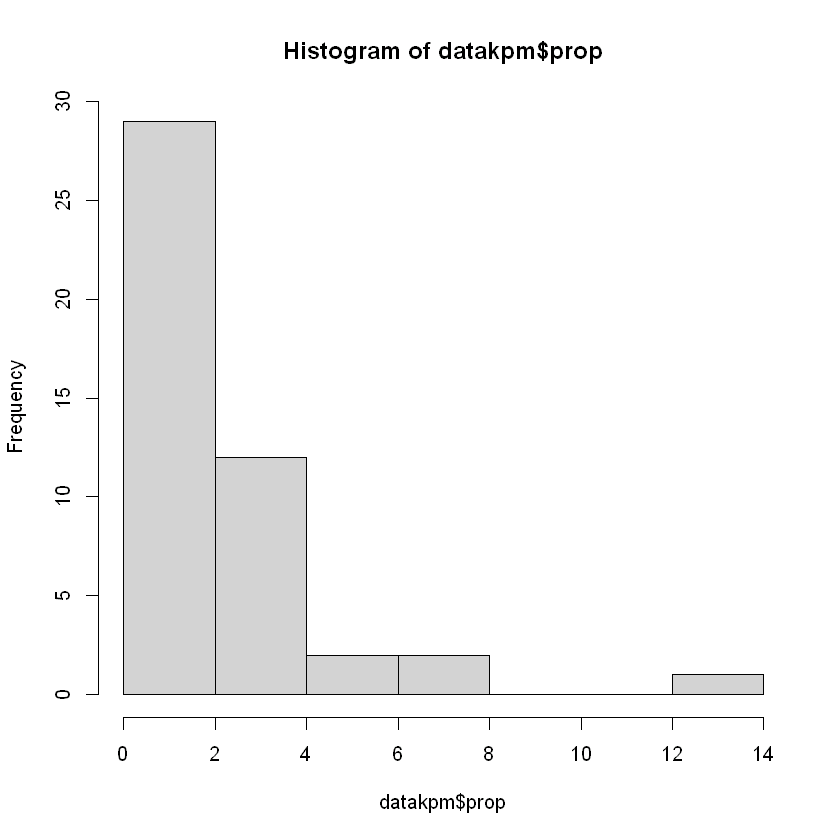

In [15]:
hist(datakpm$prop)

In [16]:
# Urutkan data berdasarkan ntotal
datakpm <- datakpm[order(datakpm$ntotal, decreasing = TRUE), ]

# Tetapkan strata berdasarkan urutan
datakpm$kpm <- c(rep("Besar", 15), 
                 rep("Sedang", 16), 
                 rep("Kecil", nrow(datakpm) - 31))

# Konversi kolom kpm menjadi faktor dengan urutan
datakpm$kpm <- factor(datakpm$kpm, levels = c("Kecil", "Sedang", "Besar"), ordered = TRUE)

In [17]:
# order kecil sedang besar
datakpm$kpm <- factor(datakpm$kpm, 
    levels = c("Kecil", "Sedang", "Besar"), 
    ordered = TRUE) 
# order by prop
datakpm <- datakpm[order(datakpm$prop, decreasing = F), ]
table(datakpm$kpm)


 Kecil Sedang  Besar 
    15     16     15 

In [18]:
datashowtype <- datakpm[,c(1,6)]
datashowtype$Kategori <- datashowtype$kpm
 datashowtype$kpm <- NULL
write.csv(datashowtype, "datashowtype.csv", row.names = FALSE) 


In [19]:
minumum_agen <- c(9, 13, 17)
minumum_pkh <- c(18,26,34)
minum_ps <- c(18,26,34)

In [20]:
# Tambahkan kolom jumlah minimum berdasarkan kategori
datashowtype$min_agen <- ifelse(datashowtype$Kategori == "Kecil", minumum_agen[1],
                         ifelse(datashowtype$Kategori == "Sedang", minumum_agen[2], minumum_agen[3]))

datashowtype$min_pkh <- ifelse(datashowtype$Kategori == "Kecil", minumum_pkh[1],
                        ifelse(datashowtype$Kategori == "Sedang", minumum_pkh[2], minumum_pkh[3]))

datashowtype$min_ps <- ifelse(datashowtype$Kategori == "Kecil", minum_ps[1],
                       ifelse(datashowtype$Kategori == "Sedang", minum_ps[2], minum_ps[3]))

# Tambahkan kolom total
datashowtype$total <- datashowtype$min_agen + datashowtype$min_pkh + datashowtype$min_ps

# Tampilkan hasil
# rename kolom KPM PKH	KPM Program Sembako	Agen Bank	Total
colnames(datashowtype) <- c("KPwDN", "Kategori", "KPM PKH", "KPM PS", "Agen", "Total")
# Tampilkan hasil
head(datashowtype)
write.csv(datashowtype, "datashowtype.csv", row.names = FALSE) 

,KPwDN,Kategori,KPM PKH,KPM PS,Agen,Total
,<chr>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>
31,KPwDN Papua Barat,Kecil,9,18,18,45
30,KPwDN Papua,Kecil,9,18,18,45
19,KPwDN Kalimantan Utara,Kecil,9,18,18,45
3,KPwDN Balikpapan,Kecil,9,18,18,45
21,KPwDN Kepulauan Bangka Belitung,Kecil,9,18,18,45
27,KPwDN Maluku Utara,Kecil,9,18,18,45
